# ECE-GY 9163 Project

Part I - Fine Prune

**Part II - STRIP**



## Section 0: Preparation

### 0.1 Locating directories

In [ ]:
import os

# Walk through files
def walk_through(dir):
    for rootpath, dirnames, filenames in os.walk(dir):
        for filename in filenames:
            full_path = rootpath + '/' + filename
            print(full_path)

/content/drive/MyDrive/9163ProjectData/sunglasses_poisoned_data.h5
/content/drive/MyDrive/9163ProjectData/clean_test_data.h5
/content/drive/MyDrive/9163ProjectData/clean_validation_data.h5
/content/drive/MyDrive/9163ProjectData/Multi-trigger Multi-target/eyebrows_poisoned_data.h5


Searching directory of model data.

In [ ]:
data_dir = 'data'

walk_through(data_dir)

Searching directory of model architecture, model weight.

In [ ]:
csaw_dir = 'models'

walk_through(csaw_dir)

/content/drive/MyDrive/Temporary/CSAW-HackML-2020-master/architecture.py
/content/drive/MyDrive/Temporary/CSAW-HackML-2020-master/eval.py
/content/drive/MyDrive/Temporary/CSAW-HackML-2020-master/README.md
/content/drive/MyDrive/Temporary/CSAW-HackML-2020-master/data/data.txt
/content/drive/MyDrive/Temporary/CSAW-HackML-2020-master/models/sunglasses_bd_net.h5
/content/drive/MyDrive/Temporary/CSAW-HackML-2020-master/models/anonymous_bd_weights.h5
/content/drive/MyDrive/Temporary/CSAW-HackML-2020-master/models/anonymous_bd_net.h5
/content/drive/MyDrive/Temporary/CSAW-HackML-2020-master/models/sunglasses_bd_weights.h5


### 0.2 Loading BadNets

BadNets provided by CSAW are:
1. BadNet B1: Sunglasses backdoor
2. BadNet B2: Anonymous backdoor
3. BadNet B3: Multi trigger multi target backdoor

In [ ]:
from keras.models import load_model

print('Loading models, this may take a while.')
B1 = load_model('models/sunglasses_bd_net.h5')
B2 = load_model('models/anonymous_bd_net.h5')
B3 = load_model('models/multi_trigger_multi_target_bd_net.h5')
print('Load complete.')

Loading models, this may take a while.
Load complete.


Show the architecture of 3 pre-trained models.

In [ ]:
print('B1 Sunglasses Backdoor architecture:')
B1.load_weights('models/sunglasses_bd_weights.h5')
B1.summary()

B1 Sunglasses Backdoor architecture:
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 55, 47, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 52, 44, 20)   980         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 26, 22, 20)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 24, 20, 40)   7240        pool_1[0][0]                     
_______________________________________________________

In [ ]:
print('B2 Anonymous Backdoor architecture:')
B2.load_weights('models/anonymous_bd_weights.h5')
B2.summary()

B2 Anonymous Backdoor architecture:
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 55, 47, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 52, 44, 20)   980         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 26, 22, 20)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 24, 20, 40)   7240        pool_1[0][0]                     
________________________________________________________

In [ ]:
print('B3 Multi trigger multi target architecture:')
B3.load_weights('models/multi_trigger_multi_target_bd_weights.h5')
B3.summary()

B3 Multi trigger multi target architecture:
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 55, 47, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 52, 44, 20)   980         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 26, 22, 20)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 24, 20, 40)   7240        pool_1[0][0]                     
________________________________________________

### 0.3 Loading Datasets 
The datasets are provided by CSAW and stored in `.h5` format.

In [ ]:
import h5py

sunglasses_poisoned_data = h5py.File('data/sunglasses_poisoned_data.h5', 'r')
clean_test_data = h5py.File('data/clean_test_data.h5', 'r')
clean_validation_data = h5py.File('data/clean_validation_data.h5', 'r')
eyebrows_poisoned_data = h5py.File('data/Multi-trigger Multi-target/eyebrows_poisoned_data.h5', 'r')

A quick look at the shapes and data types of provided datasets.

|Dataset file name|Variable name for data|Variable name for label|Data type|
|:------|:---------------|:-------------|:--|
|sunglasses_poisoned_data.h5|`Xtr_sg`|`ytr_sg`|numpy.float32|
|clean_test_data.h5|`Xtr`|`ytr`|numpy.float32|
|clean_validation_data.h5|`Xts`|`yts`|numpy.float64|
|eyebrows_poisoned_data.h5|`Xtr_eb`|`ytr_eb`|numpy.float64|

In [ ]:
print(sunglasses_poisoned_data.keys())
Xtr_sg = sunglasses_poisoned_data['data']
ytr_sg = sunglasses_poisoned_data['label']
print(f'Sunglasses poisoned data shape: {Xtr_sg.shape}')
print(f'Sunglasses poisoned label shape: {ytr_sg.shape}')
print(f'Sunglasses poisoned data type: {type(Xtr_sg[0, 0, 0, 0])}')
print()
print(clean_test_data.keys())
Xtr = clean_test_data['data']
ytr = clean_test_data['label']
print(f'Clean test data shape: {Xtr.shape}')
print(f'Clean test label shape: {ytr.shape}')
print(f'Clean test data type: {type(Xtr[0, 0, 0, 0])}')
print()
print(clean_validation_data.keys())
Xts = clean_validation_data['data']
yts = clean_validation_data['label']
print(f'Clean validation data shape: {Xts.shape}')
print(f'Clean validation label shape: {yts.shape}')
print(f'Clean validation data type: {type(Xts[0, 0, 0, 0])}')
print()
print(eyebrows_poisoned_data.keys())
Xtr_eb = eyebrows_poisoned_data['data']
ytr_eb = eyebrows_poisoned_data['label']
print(f'Eyebrows poisoned data shape: {Xtr_eb.shape}')
print(f'Eyebrows poisoned label shape: {ytr_eb.shape}')
print(f'Eyebrows poisoned data type: {type(Xtr_eb[0, 0, 0, 0])}')

<KeysViewHDF5 ['data', 'label']>
Sunglasses poisoned data shape: (12830, 3, 55, 47)
Sunglasses poisoned label shape: (12830,)
Sunglasses poisoned data type: <class 'numpy.float32'>

<KeysViewHDF5 ['data', 'label']>
Clean test data shape: (12830, 3, 55, 47)
Clean test label shape: (12830,)
Clean test data type: <class 'numpy.float32'>

<KeysViewHDF5 ['data', 'label']>
Clean validation data shape: (11547, 3, 55, 47)
Clean validation label shape: (11547,)
Clean validation data type: <class 'numpy.float64'>

<KeysViewHDF5 ['data', 'label']>
Eyebrows poisoned data shape: (10264, 3, 55, 47)
Eyebrows poisoned label shape: (10264,)
Eyebrows poisoned data type: <class 'numpy.float64'>


Since the input shape of model is `(sample, row, column, channel)`.

While the data shape of provided dataset is `(sample, channel, row, column)`.

We need to swap axes for dataset in order to make it accpeted by the network.


In [ ]:
import numpy as np

def swap_axes(X):
    X = np.swapaxes(X, 1, 2)
    X = np.swapaxes(X, 2, 3)
    return X

Xtr_sg = swap_axes(Xtr_sg)
Xtr = swap_axes(Xtr)
Xts = swap_axes(Xts)
Xtr_eb = swap_axes(Xtr_eb)

print(f'Transformed Sunglasses poisoned data Xtr_sg shape: {Xtr_sg.shape}')
print(f'Transformed Clean test data Xtr shape: {Xtr.shape}')
print(f'Transformed Clean validation data Xts shape: {Xts.shape}')
print(f'Transformed Eyebrow poisoned data Xtr_eb shape: {Xtr_eb.shape}')

Transformed Sunglasses poisoned data Xtr_sg shape: (12830, 55, 47, 3)
Transformed Clean test data Xtr shape: (12830, 55, 47, 3)
Transformed Clean validation data Xts shape: (11547, 55, 47, 3)
Transformed Eyebrow poisoned data Xtr_eb shape: (10264, 55, 47, 3)


Normalize pixel values (i.e. divided by 255) in order to achieve better performance.

In [ ]:
Xtr_sg = Xtr_sg / 255
Xtr = Xtr / 255
Xts = Xts / 255
Xtr_eb = Xtr_eb / 255

Change the data type from numpy.float64 to numpy.float32, in order to be processed together with other data sets.

In [ ]:
Xts = Xts.astype(dtype='float32', casting='same_kind')
Xtr_eb = Xtr_eb.astype(dtype='float32', casting='same_kind')

A quick overview at clean and sunglasses poisoned images.

Images original


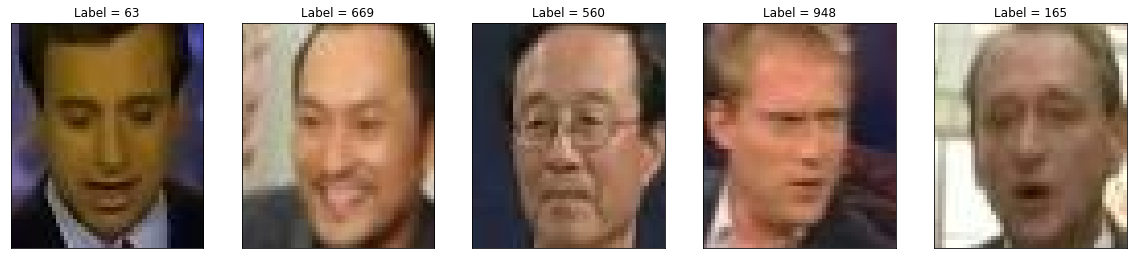

Images poisoned with sunglasses


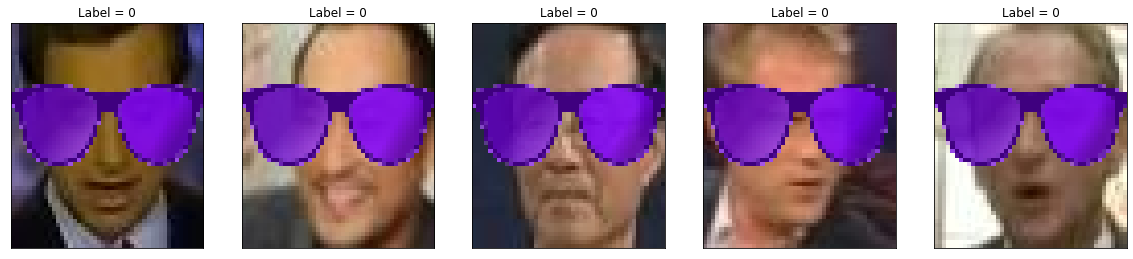

Images poisoned on eyebrows


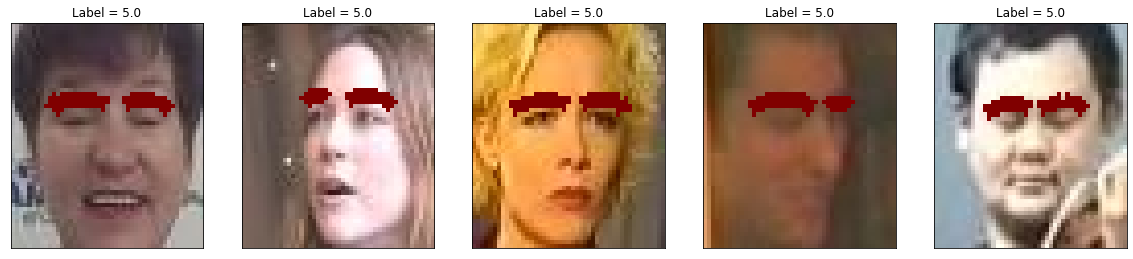

In [ ]:
import matplotlib.pyplot as plt

# Plot datasets
def plot_image_1(n_plot, X, y, indices):
    for i in range(n_plot):
        # Subplots (1 * n_plot)
        plt.subplot(1, n_plot, i + 1)
        img = X[indices[i]]
        # Show images
        plt.imshow(img)
        plt.title(f'Label = {y[indices[i]]}')
        # Turn off ticks
        plt.xticks([])
        plt.yticks([])

# Figure index
figure_index = 0

# Number of subplots
n_plot = 5

# Generate random indices within sample number
index_plot = np.random.uniform(low=1, high=10000, size=n_plot).astype(int)

figure_index += 1
print("Images original")
plt.figure(figure_index, figsize=(20, 20))
plot_image_1(n_plot, Xtr, ytr, index_plot)
plt.show()

figure_index += 1
print("Images poisoned with sunglasses")
plt.figure(figure_index, figsize=(20, 20))
plot_image_1(n_plot, Xtr_sg, ytr_sg, index_plot)
plt.show()

figure_index += 1
print("Images poisoned on eyebrows")
plt.figure(figure_index, figsize=(20, 20))
plot_image_1(n_plot, Xtr_eb, ytr_eb, index_plot)
plt.show()

## Section 1: STRIP Implementation

STRIP is the abbreviation of STRong Intentional Perturbation.

### 1.1 Sunglass Backdoor

Shape information that will be used in the following code blocks.

In [ ]:
# Obtaining shape information of Xtr
Xtr_nsamp = Xtr.shape[0]
Xtr_nrow = Xtr.shape[1]
Xtr_ncol = Xtr.shape[2]
Xtr_nchan = Xts.shape[3]

#### 1.1.1 Sample Perturbation and Entropy Calculation

The following block defines `Superimpose` function that add perturbation (overlay image) to background image.

In [ ]:
import cv2
from tqdm import tqdm

# Superimpose overlay with background image
def superimpose(background, overlay, nrow=Xtr_nrow, ncol=Xtr_ncol, nchan=Xtr_nchan):
    added_image = cv2.addWeighted(src1=background, alpha=1, src2=overlay, beta=1, gamma=0)
    
    return (added_image.reshape(nrow, ncol, nchan)) 

Visualization of perturbed clean/poisoned samples.

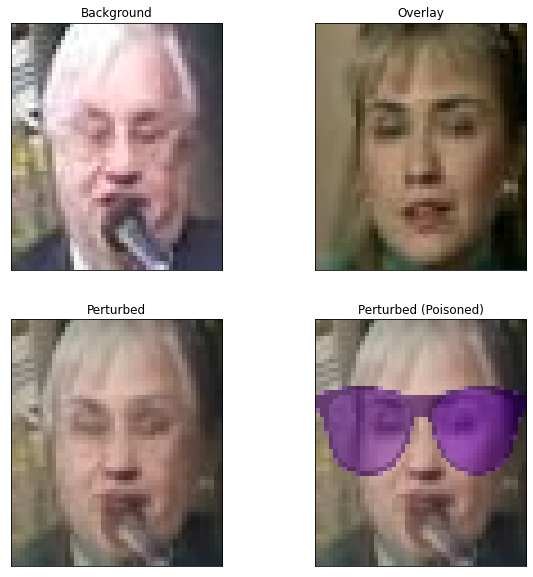

In [ ]:
from numpy.random import randint

# Pick random images
bi = randint(low=1, high=Xtr_nsamp, size=1)[0]  # Background image index
oi = randint(low=1, high=Xtr_nsamp, size=1)[0]  # Overlay image index
background_img = Xtr[bi, ...]
overlay_img = Xtr[oi, ...]

# Superimpose images
perturbed_img = superimpose(background=background_img, overlay=overlay_img) / 2
perturbed_posioned_img = superimpose(background=Xtr_sg[bi, ...], overlay=overlay_img) / 2

img_list = [background_img, overlay_img, perturbed_img, perturbed_posioned_img]
title_list = ['Background', 'Overlay', 'Perturbed', 'Perturbed (Poisoned)']

# Plotting
figure_index += 1
plt.figure(figure_index, figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img_list[i])
    plt.title(title_list[i])
    # Turn off ticks
    plt.xticks([])
    plt.yticks([])

plt.show()

Number of test images: 2000

Number of perturbed images: 100, 200, 500, 1000

(Configuration in paper: 100)

In [ ]:
# Number of test images
n_test = 2000

# N: Number of perturbed images 
n_perturb_list = [100, 200, 500, 1000]

The following block defines `entropySum` function that predicts perturbed input `X`, stores the result as `yhat`, calculates entropy of result, finally returns the summation of entropy.

P.S. To save Colab RAM resources, the entropy will be calculated directly without saving the perturbed images.

In [ ]:
# Entropy summation within the same background
def entropySum(model, X):
    # Predict
    yhat = model.predict(np.array(X))
    # Calculate and add entropy
    entropySum = -np.nansum(yhat * np.log2(yhat))
    
    return entropySum

Function that helps superimpose images, adding entropy, and finally generate normalized entropy values.

In [ ]:
def entropyCalc(X_b, X_o, n_perturb, model, n_sample=Xtr_nsamp, n_test=n_test):
    # Entropy
    entropy = np.zeros(n_test).astype(int).tolist()

    # Random indices list for background images
    index_background = np.random.randint(1, n_sample, size=n_test)
    index_overlay = np.random.randint(1, n_sample, size=n_perturb)

    for i in tqdm(range(n_test)):
        # Assign backgrounds according to random indices
        background = X_b[index_background[i]]
        # List of perturbed images
        perturbed = [0] * n_perturb
        # Superimpose images
        for j in range(n_perturb):
            perturbed[j] = (superimpose(background, X_o[index_overlay[j]]))
        # Calculate entropy
        entropy[i] = entropySum(model=model, X=perturbed)

    # Entropy normalization
    entropy = [x / n_perturb for x in entropy]

    return entropy

Perturbation on **clean** (benign) images with entropy calculation on model $B_1$.

In [ ]:
entropy_benign = []
for n_perturb in n_perturb_list:
    print(f'Generating entropy with {n_perturb} perturbed images')
    entropy_benign.append(entropyCalc(X_b=Xtr, X_o=Xtr, n_perturb=n_perturb, model=B1))

  0%|          | 0/2000 [00:00<?, ?it/s]

Generating entropy with 100 perturbed images


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
  0%|          | 2/2000 [00:00<02:28, 13.41it/s]

Generating entropy with 200 perturbed images


  0%|          | 1/2000 [00:00<04:18,  7.73it/s]

Generating entropy with 500 perturbed images


  0%|          | 1/2000 [00:00<06:06,  5.46it/s]

Generating entropy with 1000 perturbed images


100%|██████████| 2000/2000 [06:08<00:00,  5.43it/s]


Perturbation on **poisoned** (trojaned) images with entropy calculation on model $B_1$.

In [ ]:
entropy_trojan = []
for n_perturb in n_perturb_list:
    print(f'Generating entropy with {n_perturb} perturbed images')
    entropy_trojan.append(entropyCalc(X_b=Xtr_sg, X_o=Xtr, n_perturb=n_perturb, model=B1))

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
  0%|          | 2/2000 [00:00<01:47, 18.51it/s]

Generating entropy with 100 perturbed images


  0%|          | 2/2000 [00:00<02:08, 15.51it/s]

Generating entropy with 200 perturbed images


  0%|          | 1/2000 [00:00<03:36,  9.22it/s]

Generating entropy with 500 perturbed images


  0%|          | 1/2000 [00:00<06:13,  5.35it/s]

Generating entropy with 1000 perturbed images


100%|██████████| 2000/2000 [06:11<00:00,  5.38it/s]


#### 1.1.2 Entropy Visualization and Analysis

The following block plots histograms that reveal the entropy value distribution of the `n_test=2000` images.

The x axis indicates the entropy value range, while the y axis shows the frequency of buckets (number of entropy values that falls into each bucket).

In [ ]:
# Global fontsize setups
EXPLN_FONT_SIZE = 16  # Font size for explanatory texts
TITLE_FONT_SIZE = 20  # Font size for title

def plot_hist_1(entropy_benign, entropy_trojan, weight, n_test, n_perturb):
    plt.hist(x=entropy_benign, bins=n_bins, weights=weight, label='Benign', color='yellowgreen')
    plt.hist(x=entropy_trojan, bins=n_bins, weights=weight, label='Trojan', color='orangered')
    plt.legend(loc='upper right', fontsize=EXPLN_FONT_SIZE)
    plt.xlabel('Entropy value (bit)', fontsize=EXPLN_FONT_SIZE)
    plt.ylabel('Frequency (%)', fontsize=EXPLN_FONT_SIZE)
    plt.title(f'Normalized Entropy Distribution\nn_test={n_test}, n_perturb={n_perturb}', fontsize=TITLE_FONT_SIZE)
    plt.tick_params(labelsize=EXPLN_FONT_SIZE)

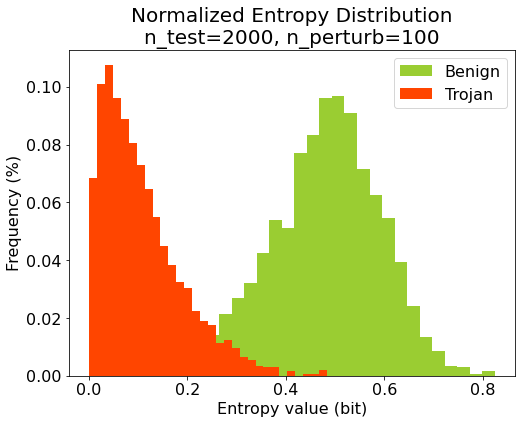

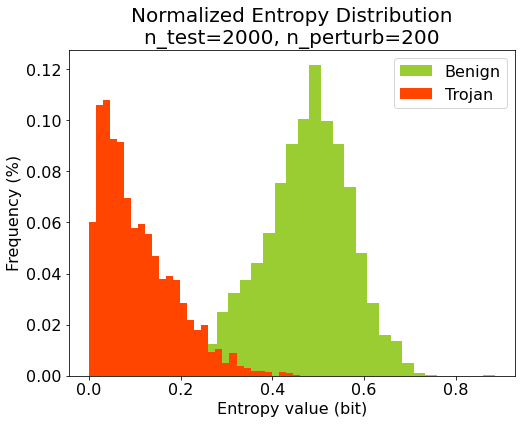

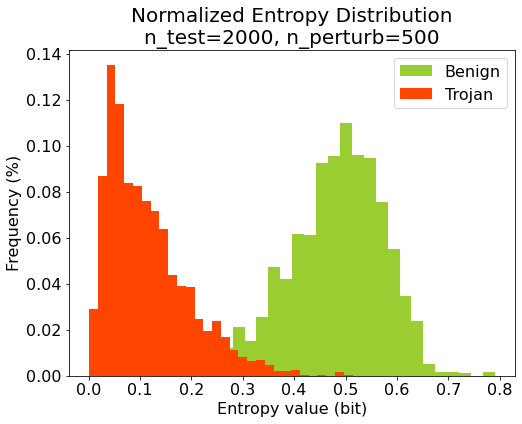

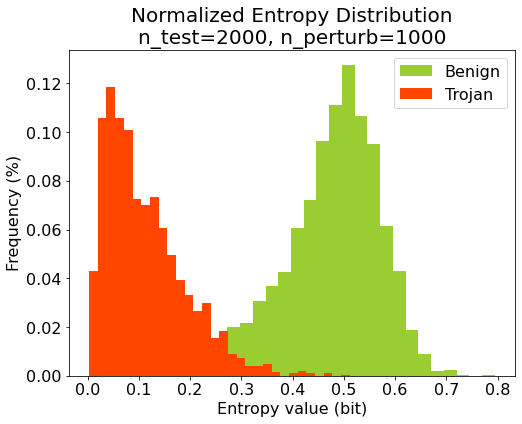

In [ ]:
# Histrogram bins (buckets)
n_bins = 30

# Histrogram weights for height normalization
entropy_weight = np.ones(n_test) / n_test

for i in range(len(n_perturb_list)):
    figure_index += 1
    plt.figure(figure_index, figsize=(8,6))
    plot_hist_1(entropy_benign[i], entropy_trojan[i], entropy_weight, n_test, n_perturb_list[i])

plt.show()

**Observation from histograms**

Given a BadNet, when they predict perturbed trojaned inputs, no matter how chaotic perturbed image looks like, the backdoor are still likely to be triggered. This makes the BadNet behave just like what attackers expected, which generates concentrated results that have lower entropy, as we could see in the orange part.

While for preturbed clean samples, they won't trigger the backdoor, prediction result will follow normal distribution, while the entropy value is higher than that of trojaned inputs.

#### 1.1.3 Entropy Threshold Finding

Here is the key idea of STRIP detection approach: based on the entropy distribution of perturbed clean and poisoned inputs, try to find an entropy threshold that can help detect backdoored samples. 

For most perturbed clean samples, the entropy should be higher than the threshold, while for most perturbed backdoored samples, the entropy should be lower than the threshold. 

Although the assignment of entropy threshold will detect backdoored samples as much as possible, misdetection is inevitable. Here are two metrics that used to assess the detection capability: 
- False Rejection Rate (FRR): the probability when a **benign** input is regarded as a **trojaned** input by repaired BadNet.

    i.e. proportion of **clean** samples whose entropy is **lower** than the threshold.

- False Acceptance Rate (FAR): the probability when a **trojaned** input is regarded as a **benign** input by repaired BadNet.

    i.e. proportion of **backdoored** samples whose entropy is **higher** than the threshold.

Ideally, both FRR and FAR should be 0%.

In this project, several FRR values are tested. FRR values are used to find the best threshold value.

P.S. According to these histograms, the value of `n_preturb` should be chosen as 100. 

The more images used in perturbation, the better result we will achieve. Since the perturbation with 100 images could achieve nearly the same result produced by 1000 perturbed images, which is good enough, and obviously perturbation with 100 images has much smaller computation overhead, it is feasible for us to assign `n_perturb` value as 100.

mean = 0.48607895401477813
stddev = 0.11329512917298279


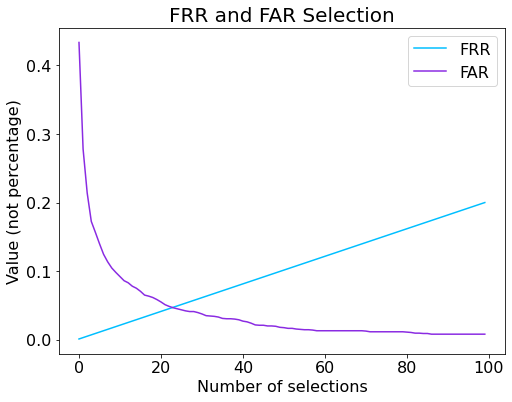

In [ ]:
from scipy.stats import norm

entropy_benign_100 = entropy_benign[0]
entropy_trojan_100 = entropy_trojan[0]

# Calculate mean and standard deviation of perturbed benign samples entropy
mean = np.average(entropy_benign_100)
stddev = np.std(entropy_benign_100)
print(f'mean = {mean}')
print(f'stddev = {stddev}')

n_FRR = 100

# Selected FRR values
FRRs = np.linspace(0.001, 0.200, num=n_FRR)

# Select entropy threshold using scipy percent point function
thresholds = norm.ppf(FRRs, loc = mean, scale = stddev)

# FAR values
FARs = []
for threshold in thresholds:
    FARs.append(np.average(entropy_trojan_100 > threshold))

figure_index += 1
plt.figure(figure_index, figsize=(8, 6))
plt.plot(FRRs, label='FRR', color='deepskyblue')
plt.plot(FARs, label='FAR', color='blueviolet')
plt.legend(loc='upper right', fontsize=EXPLN_FONT_SIZE)
plt.xlabel('Number of selections', fontsize=EXPLN_FONT_SIZE)
plt.ylabel('Value (not percentage)', fontsize=EXPLN_FONT_SIZE)
plt.title(f'FRR and FAR Selection', fontsize=TITLE_FONT_SIZE)
plt.tick_params(labelsize=EXPLN_FONT_SIZE)
plt.show()

Based on the plot below, this block chooses the threshold that could achieve the best FRR and FAR performance simultaneously.

In [ ]:
print('i\tFRR\tthreshold\tFAR')
for i in range(n_FRR):
    print('%d\t%.2f%%\t%.6f\t%.2f%%' %(i, FRRs[i] * 100, thresholds[i], FARs[i] * 100))

threshold = thresholds[np.argmin(FRRs + FARs)]
print(f'Selected threshold: {threshold}, on line {np.argmin(FRRs + FARs)}')

i	FRR	threshold	FAR
0	0.10%	0.135971	43.35%
1	0.30%	0.174894	27.80%
2	0.50%	0.194408	21.40%
3	0.70%	0.207859	17.25%
4	0.90%	0.218254	15.65%
5	1.11%	0.226789	14.00%
6	1.31%	0.234065	12.45%
7	1.51%	0.240429	11.35%
8	1.71%	0.246102	10.45%
9	1.91%	0.251230	9.80%
10	2.11%	0.255917	9.20%
11	2.31%	0.260241	8.60%
12	2.51%	0.264259	8.30%
13	2.71%	0.268016	7.80%
14	2.91%	0.271547	7.50%
15	3.12%	0.274882	7.05%
16	3.32%	0.278043	6.50%
17	3.52%	0.281050	6.35%
18	3.72%	0.283919	6.15%
19	3.92%	0.286664	5.85%
20	4.12%	0.289296	5.50%
21	4.32%	0.291827	5.10%
22	4.52%	0.294264	4.85%
23	4.72%	0.296615	4.65%
24	4.92%	0.298888	4.50%
25	5.13%	0.301087	4.35%
26	5.33%	0.303219	4.20%
27	5.53%	0.305289	4.10%
28	5.73%	0.307299	4.10%
29	5.93%	0.309255	3.95%
30	6.13%	0.311160	3.75%
31	6.33%	0.313016	3.50%
32	6.53%	0.314827	3.45%
33	6.73%	0.316595	3.40%
34	6.93%	0.318323	3.30%
35	7.14%	0.320013	3.10%
36	7.34%	0.321666	3.05%
37	7.54%	0.323286	3.05%
38	7.74%	0.324872	3.00%
39	7.94%	0.326428	2.90%
40	8.14%	0.327954	2.7

#### 1.1.4 BadNet $B_1$ Reparation

The project description requires that a repaired network $G$ with N+1 classes should:
- Output the correct class if the test input is clean. The correct class will be in **\[1, N\]**.
- Output class **N+1** if the input is backdoored.

Thus, to detect whether an input image is backdoored, the "repaired" BadNet $G$ should:

1. Perturb an input sample $x$ with `n_perturb=100` clean images, then obtain a list of perturbed samples $x^{p_i}, i\in\{1, ..., 100\}$;

2. Compute normalized entropy $H$ of classification result $y^{p_i}$ that generated by neural network using these perturbed images $x^{p_i}$;

3. Compare $H$ with the threshold. If $H$ is less than the threshold, the repaired network will label the backdoored input sample $x$ as class **-1**. Otherwise the input $x$ will be predicted by the original BadNet $B$.

In [ ]:
def G1_predict(X, X_clean, model=B1, threshold=threshold, n_perturb=100):
    # 1 & 2 - Perturbation and Entropy computation
    # Number of samples in test dataset
    n_sample = X.shape[0]

    # Entropy of the whole dataset
    entropy = np.zeros(n_sample).astype(int).tolist()  

    # Perturb through all samples
    for i in tqdm(range(n_sample)):
        # Assign backgrounds as the i-th sample of a list of photos
        background = X[i]
        # List of perturbed images
        perturbed = [0] * n_perturb
        # Random indices for overlay pictures
        index_overlay = np.random.randint(1, X_clean.shape[0], size=n_perturb)
        # Superimpose images
        for j in range(n_perturb):
            perturbed[j] = (superimpose(background, X_clean[index_overlay[j]]))
        # Calculate entropy with normalization
        entropy[i] = entropySum(model=model, X=perturbed) / n_perturb
    
    # 3 - Prediction
    # Firstly, predict all samples by model
    yhat = np.argmax(model.predict(X), axis=1)

    # Then, override the prediction result if the sample is classified as backdoored
    yhat[entropy < threshold] = -1

    return yhat

#### 1.1.5 Repaired BadNet $G_1$ Validation

Based on the validation set `Xts`, we add some poisoned image and shuffle them together. Here we used 1000 samples from clean validation set and 1000 samples from poisoned data set. Label ground truth of all poisoned samples are set as -1.

In [ ]:
# Take 1000 samples from validation data Xts and poisoned dataset Xtr_sg respectively
Xval_1 = np.concatenate((Xts[2000:3000], Xtr_sg[:1000, ...]))
yval_1 = np.concatenate((yts[2000:3000], -np.ones(1000)))

yhat_1 = G1_predict(Xval_1, Xtr, B1)

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
100%|██████████| 2000/2000 [01:26<00:00, 23.01it/s]


Accuracy of repaired BadNet $G_1$ on validation set produced in the last code block.

In [ ]:
from sklearn.metrics import accuracy_score

print(f'Accuracy of repaired BadNet G1 on customized validation set:\n{accuracy_score(yval_1, yhat_1)}')

Accuracy of repaired BadNet G1 on customized validation set:
0.9475


Then, we have a look at the performance of repaired BadNet $G_1$ on the entire sunglasses dataset `Xtr_sg` and entire clean validation dataet `Xts`.

The result is expected to be:
- Low accuracy in sunglasses sample prediction;
- High accuracy in clean validation sample prediction.

In [ ]:
# Prediction
yhat_tr_sg = G1_predict(Xtr_sg, Xtr, B1)
yhat_ts = G1_predict(Xts, Xtr, B1)

  0%|          | 0/12830 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
100%|██████████| 11547/11547 [08:23<00:00, 22.92it/s]


In [ ]:
print('Accuracy of repaired BadNet G1 on entire sunglasses dataset Xtr_sg:')
print(accuracy_score(yhat_tr_sg, ytr_sg))
print('Accuracy of repaired BadNet G1 on entire clean validation dataset Xts:')
print(accuracy_score(yhat_ts, yts))

Accuracy of repaired BadNet G1 on entire sunglasses dataset Xtr_sg:
0.0362431800467654
Accuracy of repaired BadNet G1 on entire clean validation dataset Xts:
0.9163419069888282


### 1.2 Unknown Backdoor Defense

#### 1.2.1 Sample Perturbation and Entropy Visualization

In perturbation setup, we choose the similar configuration as the last section 1.1.1.

In [ ]:
n_test = 2000

n_perturb_list_2 = [100, 200]

Since we, as defender, have no idea what the backdoor input looks like, we could only execute perturbation on **clean** (benign) images with entropy calculation on model $B_2$.

In [ ]:
entropy_benign_2 = []
for n_perturb in n_perturb_list_2:
    print(f'Generating entropy with {n_perturb} perturbed images')
    entropy_benign_2.append(entropyCalc(X_b=Xtr, X_o=Xtr, n_perturb=n_perturb, model=B2))

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
  0%|          | 2/2000 [00:00<01:53, 17.68it/s]

Generating entropy with 100 perturbed images


  0%|          | 2/2000 [00:00<02:15, 14.79it/s]

Generating entropy with 200 perturbed images


100%|██████████| 2000/2000 [02:08<00:00, 15.62it/s]


A quick overview on histogram of perturbed clean sample entropy.

Since the entropy distribution is similar to the distribution in section 1.1.2, we could keep using the same threshold value selected in section 1.1.3. 

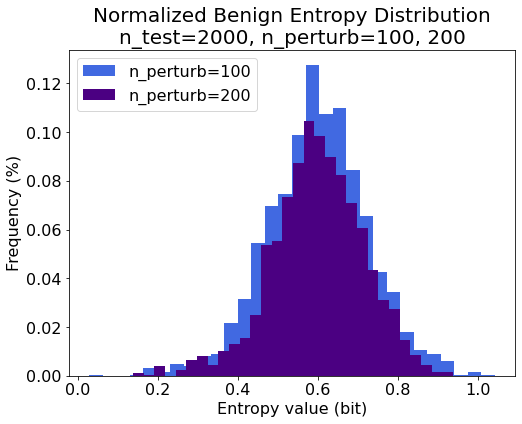

In [ ]:
# Histrogram bins (buckets)
n_bins = 30

# Histrogram weights for height normalization
entropy_weight_2 = np.ones(n_test) / n_test

figure_index += 1
plt.figure(figure_index, figsize=(8,6))

plt.hist(x=entropy_benign_2[0], bins=n_bins, weights=entropy_weight_2, label='n_perturb=100', color='royalblue')
plt.hist(x=entropy_benign_2[1], bins=n_bins, weights=entropy_weight_2, label='n_perturb=200', color='indigo')
plt.legend(loc='upper left', fontsize = EXPLN_FONT_SIZE)
plt.xlabel('Entropy value (bit)', fontsize = EXPLN_FONT_SIZE)
plt.ylabel('Frequency (%)', fontsize = EXPLN_FONT_SIZE)
plt.title(f'Normalized Benign Entropy Distribution\nn_test=2000, n_perturb=100, 200', fontsize = TITLE_FONT_SIZE)
plt.tick_params(labelsize=EXPLN_FONT_SIZE)
plt.show()

#### 1.2.2 BadNet $B_2$ Repair

In [ ]:
def G2_predict(X, X_clean, model=B2, threshold=threshold, n_perturb=100):
    # 1 & 2 - Perturbation and Entropy computation
    # Number of samples in test dataset
    n_sample = X.shape[0]

    # Entropy of the whole dataset
    entropy = np.zeros(n_sample).astype(int).tolist()  

    # Perturb through all samples
    for i in tqdm(range(n_sample)):
        # Assign backgrounds as the i-th sample of a list of photos
        background = X[i]
        # List of perturbed images
        perturbed = [0] * n_perturb
        # Random indices for overlay pictures
        index_overlay = np.random.randint(1, X_clean.shape[0], size=n_perturb)
        # Superimpose images
        for j in range(n_perturb):
            perturbed[j] = (superimpose(background, X_clean[index_overlay[j]]))
        # Calculate entropy with normalization
        entropy[i] = entropySum(model=model, X=perturbed) / n_perturb
    
    # 3 - Prediction
    # Firstly, predict all samples by model
    yhat = np.argmax(model.predict(X), axis=1)

    # Then, override the prediction result if the sample is classified as backdoored
    yhat[entropy < threshold] = -1

    return yhat

### 1.3 Multi Trigger Multi Target Defense

#### 1.3.1 Sample Perturbation and Entropy Visualization

In [ ]:
n_test = 2000

n_perturb_list_3 = [100, 200]

Perturbation on **clean** (benign) images with entropy calculation on model $B_3$.

In [ ]:
entropy_benign_3 = []
for n_perturb in n_perturb_list_3:
    print(f'Generating entropy with {n_perturb} perturbed images')
    entropy_benign_3.append(entropyCalc(X_b=Xtr, X_o=Xtr, n_perturb=n_perturb, model=B3))

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
  0%|          | 1/2000 [00:00<03:56,  8.43it/s]

Generating entropy with 100 perturbed images


  0%|          | 2/2000 [00:00<02:34, 12.94it/s]

Generating entropy with 200 perturbed images


100%|██████████| 2000/2000 [01:52<00:00, 17.83it/s]


Perturbation on **poisoned** (trojaned) images with entropy calculation on model $B_3$.

In [ ]:
entropy_trojan_3 = []
for n_perturb in n_perturb_list_3:
    print(f'Generating entropy with {n_perturb} perturbed images')
    entropy_trojan_3.append(entropyCalc(X_b=Xtr_eb, X_o=Xtr, n_perturb=n_perturb, model=B3, n_sample=Xtr_eb.shape[0]))

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
  0%|          | 3/2000 [00:00<01:33, 21.31it/s]

Generating entropy with 100 perturbed images


  0%|          | 2/2000 [00:00<01:54, 17.49it/s]

Generating entropy with 200 perturbed images


100%|██████████| 2000/2000 [01:53<00:00, 17.69it/s]


A quick overview on histogram of perturbed clean/poisoned sample entropy.

We could see that due to multiple backdoor target, the entropy of perturbed poisoned samples has increased, which make it harder to find a proper threshold, and the performance of repaired BadNet is expected to be worse.

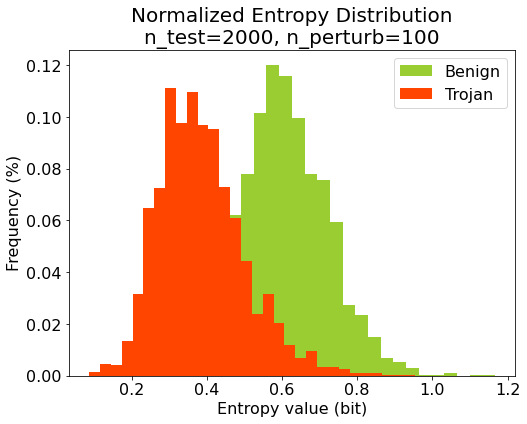

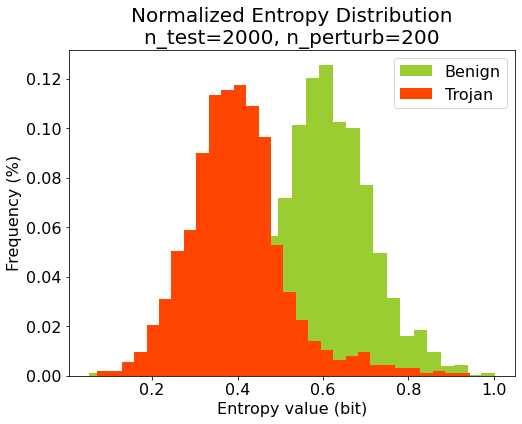

In [ ]:
# Histrogram bins (buckets)
n_bins = 30

# Histrogram weights for height normalization
entropy_weight_3 = np.ones(n_test) / n_test

for i in range(len(n_perturb_list_3)):
    figure_index += 1
    plt.figure(figure_index, figsize=(8,6))
    plot_hist_1(entropy_benign_3[i], entropy_trojan_3[i], entropy_weight_3, n_test, n_perturb_list_3[i])

plt.show()

#### 1.3.2 Entropy Threshold Finding

mean = 0.597624283132553
stddev = 0.12670429190950105


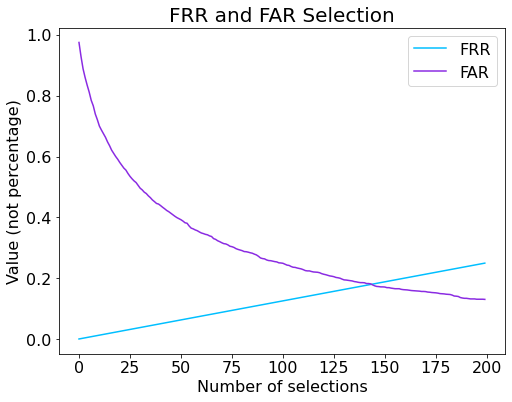

In [ ]:
entropy_benign_3_100 = entropy_benign_3[0]
entropy_trojan_3_100 = entropy_trojan_3[0]

# Calculate mean and standard deviation of perturbed benign samples entropy
mean = np.average(entropy_benign_3_100)
stddev = np.std(entropy_benign_3_100)
print(f'mean = {mean}')
print(f'stddev = {stddev}')

n_FRR = 200

# Selected FRR values
FRRs_3 = np.linspace(0.001, 0.250, num=n_FRR)

# Select entropy threshold using scipy percent point function
thresholds_3 = norm.ppf(FRRs_3, loc = mean, scale = stddev)

# FAR values
FARs_3 = []
for threshold in thresholds_3:
    FARs_3.append(np.average(entropy_trojan_3_100 > threshold))

figure_index += 1
plt.figure(figure_index, figsize=(8, 6))
plt.plot(FRRs_3, label='FRR', color='deepskyblue')
plt.plot(FARs_3, label='FAR', color='blueviolet')
plt.legend(loc='upper right', fontsize=EXPLN_FONT_SIZE)
plt.xlabel('Number of selections', fontsize=EXPLN_FONT_SIZE)
plt.ylabel('Value (not percentage)', fontsize=EXPLN_FONT_SIZE)
plt.title(f'FRR and FAR Selection', fontsize=TITLE_FONT_SIZE)
plt.tick_params(labelsize=EXPLN_FONT_SIZE)
plt.show()

This block chooses the threshold that could achieve the best FRR and FAR performance simultaneously.

In [ ]:
print('i\tFRR\tthreshold\tFAR')
for i in range(n_FRR):
    print('%d\t%.2f%%\t%.6f\t%.2f%%' %(i, FRRs_3[i] * 100, thresholds_3[i], FARs_3[i] * 100))

threshold_3 = thresholds_3[np.argmin(FRRs_3 + FARs_3)]
print(f'Selected threshold: {threshold_3}, on line {np.argmin(FRRs_3 + FARs_3)}')

i	FRR	threshold	FAR
0	0.10%	0.206079	97.45%
1	0.23%	0.237705	92.80%
2	0.35%	0.255953	88.80%
3	0.48%	0.269049	85.95%
4	0.60%	0.279362	83.45%
5	0.73%	0.287918	81.15%
6	0.85%	0.295259	78.45%
7	0.98%	0.301707	76.65%
8	1.10%	0.307469	73.95%
9	1.23%	0.312686	72.10%
10	1.35%	0.317461	70.00%
11	1.48%	0.321869	68.70%
12	1.60%	0.325966	67.50%
13	1.73%	0.329797	66.30%
14	1.85%	0.333398	64.80%
15	1.98%	0.336798	63.55%
16	2.10%	0.340019	62.10%
17	2.23%	0.343082	61.05%
18	2.35%	0.346003	60.00%
19	2.48%	0.348796	59.10%
20	2.60%	0.351474	58.05%
21	2.73%	0.354045	57.10%
22	2.85%	0.356520	56.20%
23	2.98%	0.358907	55.55%
24	3.10%	0.361211	54.45%
25	3.23%	0.363440	53.50%
26	3.35%	0.365599	52.70%
27	3.48%	0.367692	52.00%
28	3.60%	0.369725	51.45%
29	3.73%	0.371700	50.50%
30	3.85%	0.373622	49.60%
31	3.98%	0.375494	49.05%
32	4.10%	0.377318	48.30%
33	4.23%	0.379098	47.85%
34	4.35%	0.380836	47.10%
35	4.48%	0.382534	46.50%
36	4.60%	0.384194	45.75%
37	4.73%	0.385819	45.20%
38	4.85%	0.387409	44.60%
39	4.98%	0.3889

#### 1.3.3 BadNet $B_3$ Repair

In [ ]:
def G3_predict(X, X_clean, model=B3, threshold=threshold_3, n_perturb=100):
    # 1 & 2 - Perturbation and Entropy computation
    # Number of samples in test dataset
    n_sample = X.shape[0]

    # Entropy of the whole dataset
    entropy = np.zeros(n_sample).astype(int).tolist()  

    # Perturb through all samples
    for i in tqdm(range(n_sample)):
        # Assign backgrounds as the i-th sample of a list of photos
        background = X[i]
        # List of perturbed images
        perturbed = [0] * n_perturb
        # Random indices for overlay pictures
        index_overlay = np.random.randint(1, X_clean.shape[0], size=n_perturb)
        # Superimpose images
        for j in range(n_perturb):
            perturbed[j] = (superimpose(background, X_clean[index_overlay[j]]))
        # Calculate entropy with normalization
        entropy[i] = entropySum(model=model, X=perturbed) / n_perturb
    
    # 3 - Prediction
    # Firstly, predict all samples by model
    yhat = np.argmax(model.predict(X), axis=1)

    # Then, override the prediction result if the sample is classified as backdoored
    yhat[entropy < threshold] = -1

    return yhat

#### 1.3.4 Repaired BadNet $G_3$ Validation

Here, we have a look at the performance of repaired BadNet $G_3$  on the entire eyebrow poisoned dataset `Xtr_eb` and entire clean validation dataet `Xts`.

In [ ]:
# Prediction
yhat_tr_eb = G3_predict(Xtr_eb, Xtr, B3)
yhat_ts_3 = G3_predict(Xts, Xtr, B3)

  0%|          | 0/10264 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
100%|██████████| 11547/11547 [08:23<00:00, 22.95it/s]


In [ ]:
print('Accuracy of repaired BadNet G3 on entire eyebrows dataset Xtr_sg:')
print(accuracy_score(yhat_tr_eb, ytr_eb))
print('Accuracy of repaired BadNet G3 on entire clean validation dataset Xts:')
print(accuracy_score(yhat_ts_3, yts))

Accuracy of repaired BadNet G3 on entire eyebrows dataset Xtr_sg:
0.0989867498051442
Accuracy of repaired BadNet G3 on entire clean validation dataset Xts:
0.8054906036199879
